In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pokemon = pd.read_csv("pokemon.csv")

In [4]:
pokemon.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,29961,29962,29963,29964,29965,29966,29967,29968,29969,29970,29971,29972,29973,29974,29975,29976,29977,29978,29979,29980,29981,29982,29983,29984,29985,29986,29987,29988,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999,target
0,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,...,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,37,106,111,Charmander
1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,145,12,16,255,255,254,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,Charmander
2,103,244,68,91,234,60,86,226,53,91,232,58,93,230,57,86,225,54,89,227,55,85,224,52,85,224,55,83,227,54,84,223,52,86,224,54,87,227,55,88,...,81,226,57,90,231,57,91,228,55,92,234,57,88,232,57,87,231,56,86,230,57,79,226,63,84,228,57,78,218,51,78,219,57,78,218,53,123,255,74,Pikachu
3,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,Pikachu
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bulbasaur


In [5]:
pokemon.shape

(304, 30001)

In [26]:
pokemon.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
29996     0
29997     0
29998     0
29999     0
target    0
Length: 30001, dtype: int64

In [6]:
y = pokemon['target']
x = pokemon.drop(columns= ['target'], inplace = False)
print(y.head())
print(x.head())

0    Charmander
1    Charmander
2       Pikachu
3       Pikachu
4     Bulbasaur
Name: target, dtype: object
     0    1    2    3    4    5  ...  29994  29995  29996  29997  29998  29999
0   37  106  111   37  106  111  ...     37    106    111     37    106    111
1  255  255  255  255  255  255  ...    255    255    255    255    255    255
2  103  244   68   91  234   60  ...     78    218     53    123    255     74
3  255  255  255  255  255  255  ...    255    255    255    255    255    255
4    0    0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 30000 columns]


In [7]:
X = x.values
Y = y.values

In [8]:
print(Y.shape)
print(X.shape)

(304,)
(304, 30000)


In [16]:
from sklearn.model_selection import train_test_split
#Randomly divides the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [17]:
#model training on X_train and Y_train
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction and Comparison

In [19]:
Y_pred = model.predict(X_test)

array(['Pikachu', 'Charmander', 'Pikachu', 'Charmander', 'Bulbasaur',
       'Charmander', 'Pikachu', 'Charmander', 'Pikachu', 'Bulbasaur',
       'Charmander', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Charmander',
       'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Pikachu',
       'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Charmander',
       'Bulbasaur', 'Bulbasaur', 'Charmander', 'Charmander', 'Pikachu',
       'Pikachu', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Charmander',
       'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Charmander', 'Pikachu',
       'Pikachu', 'Pikachu', 'Pikachu', 'Charmander', 'Pikachu',
       'Charmander', 'Pikachu', 'Charmander', 'Bulbasaur', 'Pikachu',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Pikachu',
       'Pikachu', 'Charmander', 'Bulbasaur', 'Pikachu', 'Bulbasaur',
       'Pikachu', 'Charmander', 'Charmander', 'Bulbasaur', 'Charmander',
       'Bulbasaur', 'Bulbasau

In [20]:
print(X_test)

[[ 51  51 101 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


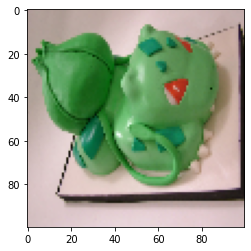

Actual Label :  Bulbasaur
Predicted Label :  ['Bulbasaur']


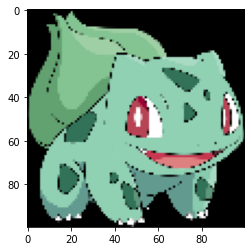

Actual Label :  Bulbasaur
Predicted Label :  ['Bulbasaur']


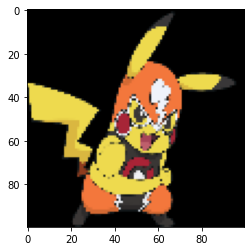

Actual Label :  Pikachu
Predicted Label :  ['Pikachu']


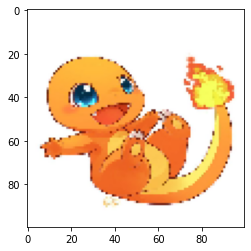

Actual Label :  Charmander
Predicted Label :  ['Charmander']


In [24]:
for i in [9,35,64,75]:
    random_img = X_test[i]
    plt.imshow(random_img.reshape(100,100,3))
    plt.show()
    print("Actual Label : ",Y_test[i])
    p = model.predict( [random_img] )
    print("Predicted Label : ", p)

### Logistic Regression Score

In [18]:
model.score(X_test,Y_test)

0.9078947368421053

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 7)

### Prediction and comparison

In [28]:
KNN_model.fit(X_train, Y_train)
Y_pred_KNN = KNN_model.predict(X_test)

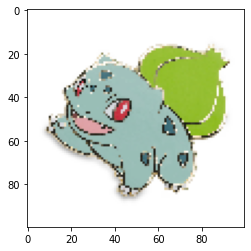

Actual Label:  Bulbasaur
Predicted Label:  ['Bulbasaur']


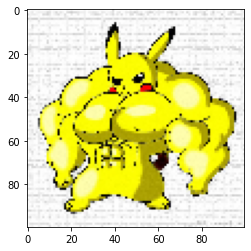

Actual Label:  Pikachu
Predicted Label:  ['Pikachu']


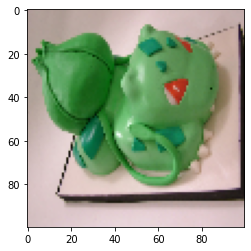

Actual Label:  Bulbasaur
Predicted Label:  ['Bulbasaur']


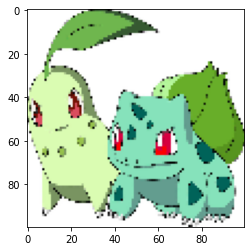

Actual Label:  Bulbasaur
Predicted Label:  ['Bulbasaur']


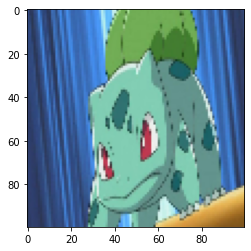

Actual Label:  Bulbasaur
Predicted Label:  ['Bulbasaur']


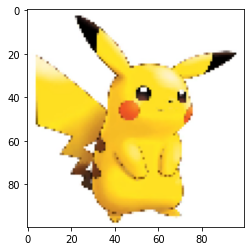

Actual Label:  Pikachu
Predicted Label:  ['Pikachu']


In [30]:
for i in [4, 8, 9, 13, 33, 58]:
  random_img = X_test[i]
  plt.imshow(random_img.reshape(100,100,3))
  plt.show()
  print("Actual Label: ", Y_test[i])
  p = KNN_model.predict([random_img])
  print("Predicted Label: ", p)

### KNN score

In [31]:
KNN_model.score(X_test, Y_test)

0.7631578947368421

# Final Conclusion
Iin case of KNN the accuracy is 76.31% while when using logistic regression the accuracy comes out to be 90.78%.

###Therefore, logistic regression is the method with greater accuracy